In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Netflix_Data = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Netflix Project/Netflix_Data.csv'))
display(Netflix_Data.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1.Handle missing values

Fill missing categorical columns with "Unknown"

In [ ]:
for col in ['director', 'cast', 'country']:
    Netflix_Data[col] = Netflix_Data[col].fillna("Unknown")


 2. Convert 'date_added' to datetime and extract year/month

In [ ]:
Netflix_Data['date_added'] = pd.to_datetime(Netflix_Data['date_added'], errors='coerce')
Netflix_Data['year_added'] = Netflix_Data['date_added'].dt.year
Netflix_Data['month_added'] = Netflix_Data['date_added'].dt.month

 3. Split 'duration' into numeric + unit

In [ ]:
def split_duration(x):
    if pd.isna(x):
        return None, None
    parts = x.split()
    value = int(parts[0]) if parts[0].isdigit() else None
    unit = parts[1] if len(parts) > 1 else None
    return value, unit

Netflix_Data[['duration_value', 'duration_unit']] = Netflix_Data['duration'].apply(
    lambda x: pd.Series(split_duration(x))
)

4. Split 'listed_in' (genres) into multiple columns

Create a list of genres for each row

In [ ]:
Netflix_Data['genres'] = Netflix_Data['listed_in'].apply(lambda x: [genre.strip() for genre in x.split(',')])

 Explode into multiple rows (one row per genre)

In [ ]:
Netflix_Data_exploded = Netflix_Data.explode('genres')

In [ ]:
display(Netflix_Data.head())
display(Netflix_Data_exploded.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value,duration_unit,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Seasons,"[International TV Shows, Romantic TV Shows, TV..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_value,duration_unit,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons,International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons,TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season,Crime TV Shows


1. Content Evolution

Movies vs TV Shows are added over time

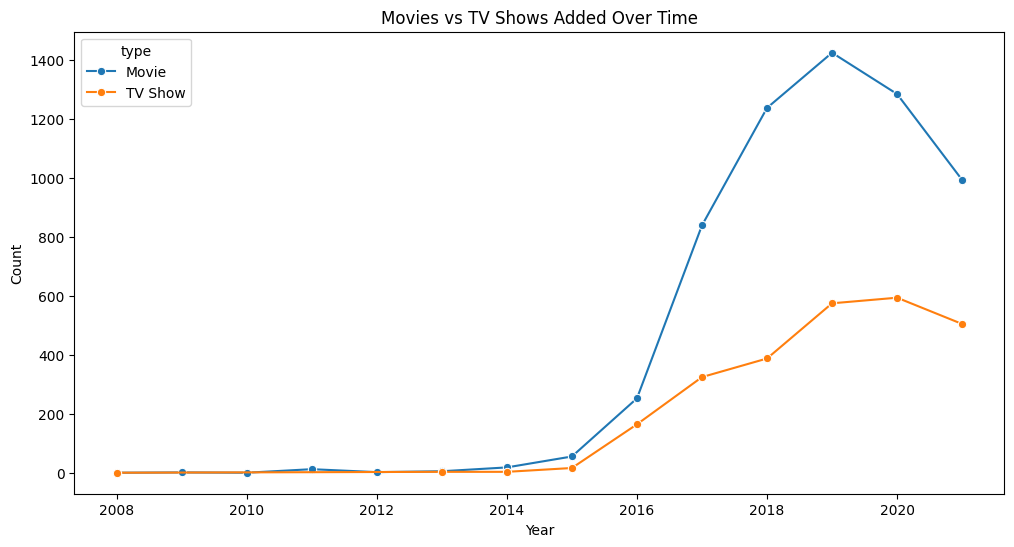

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count by type and year
content_trend = Netflix_Data.groupby(['year_added', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='year_added', y='count', hue='type', marker='o')
plt.title("Movies vs TV Shows Added Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


Growth trend (2000–2024)

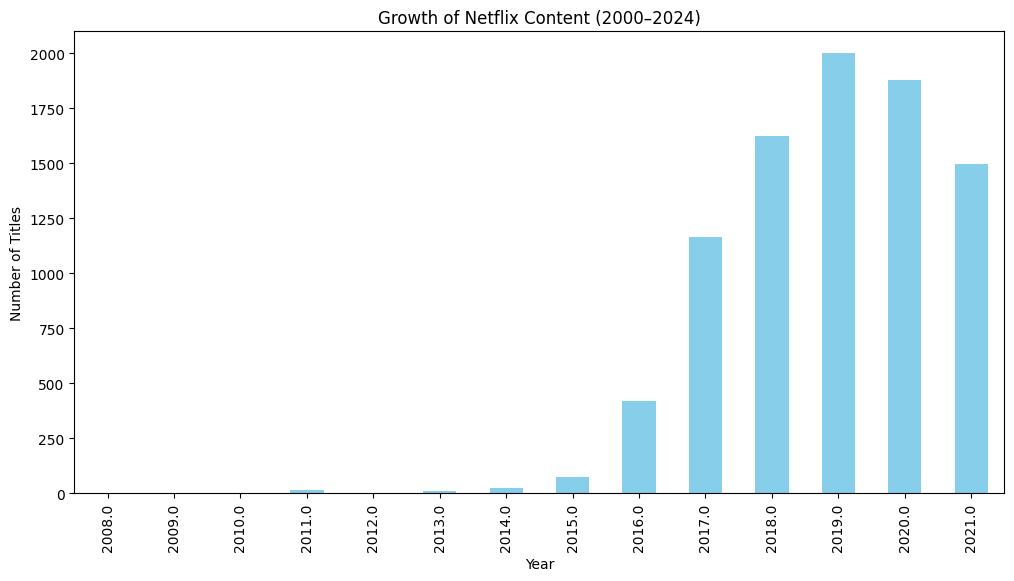

In [ ]:
growth = Netflix_Data['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
growth.plot(kind='bar', color='skyblue')
plt.title("Growth of Netflix Content (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


2. Genre & Audience Focus

Most common genres

/tmp/ipython-input-1817786932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")


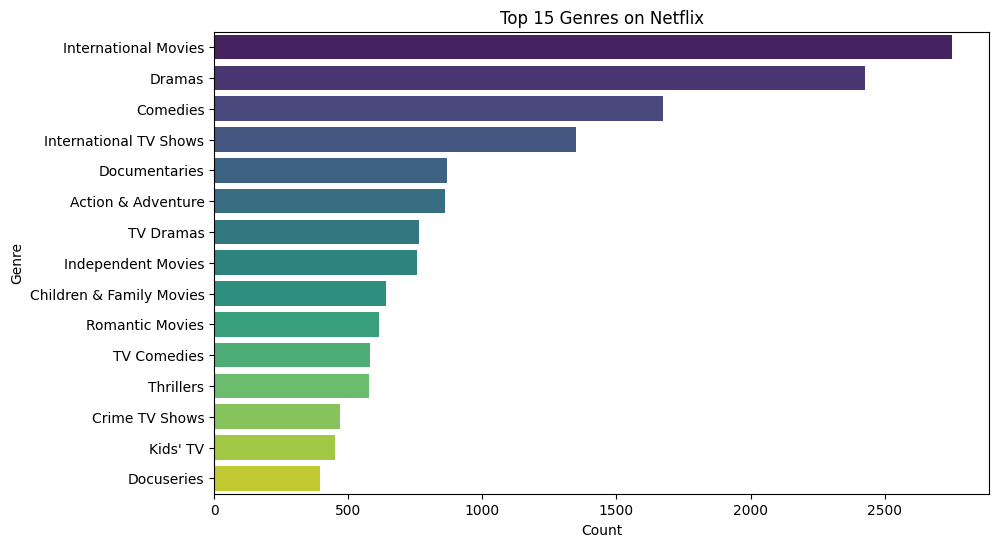

In [ ]:
top_genres = Netflix_Data_exploded['genres'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


Ratings distribution (audience targeting)

/tmp/ipython-input-1804510945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Netflix_Data, x='rating', order=Netflix_Data['rating'].value_counts().index, palette="muted")


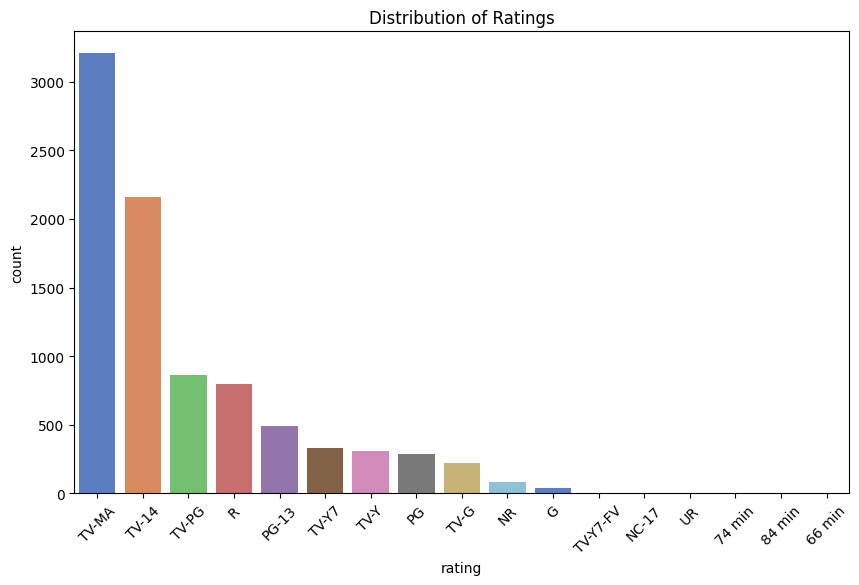

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=Netflix_Data, x='rating', order=Netflix_Data['rating'].value_counts().index, palette="muted")
plt.title("Distribution of Ratings")
plt.xticks(rotation=45)
plt.show()


3. Geography & Diversity

Countries with most titles

/tmp/ipython-input-996642526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")


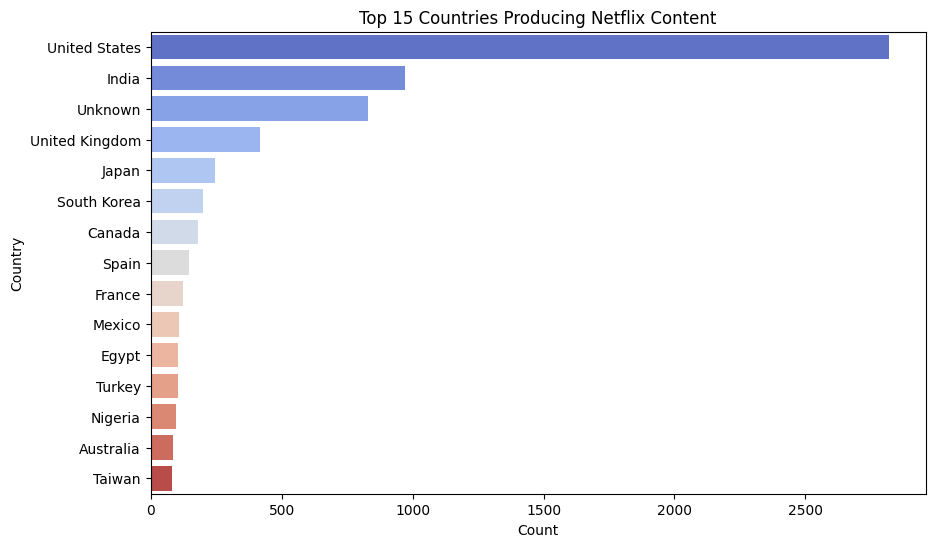

In [ ]:
top_countries = Netflix_Data['country'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.title("Top 15 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


Diversity over time (US vs Global)

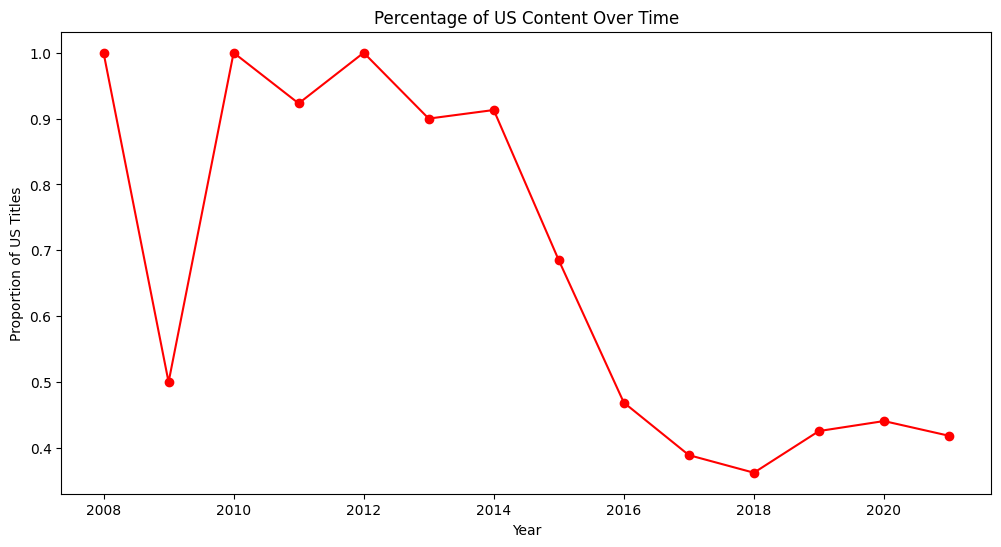

In [ ]:
Netflix_Data['is_US'] = Netflix_Data['country'].apply(lambda x: 1 if "United States" in x else 0)
diversity = Netflix_Data.groupby('year_added')['is_US'].mean()

plt.figure(figsize=(12,6))
diversity.plot(marker='o', color="red")
plt.title("Percentage of US Content Over Time")
plt.xlabel("Year")
plt.ylabel("Proportion of US Titles")
plt.show()


4. Content Duration

Movie duration trends

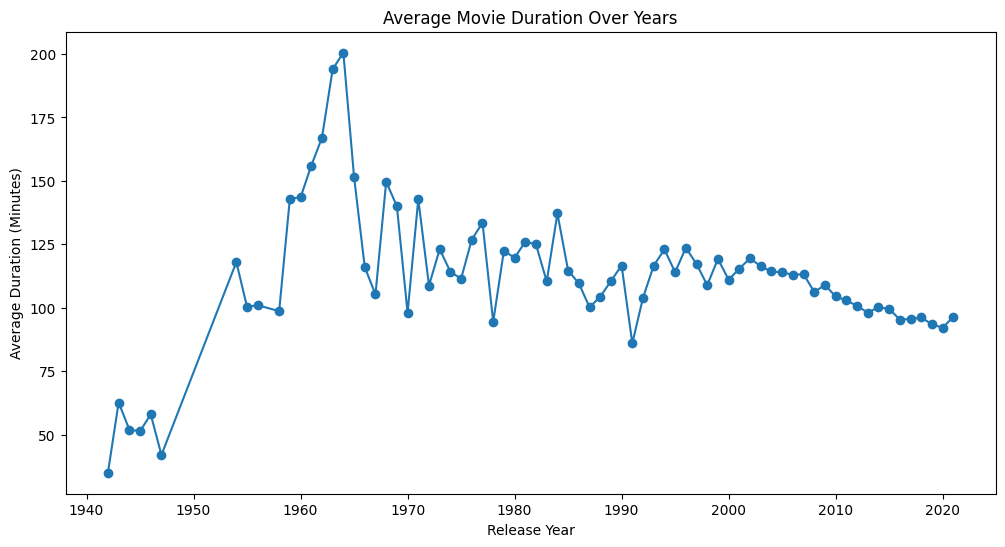

In [ ]:
movie_duration = Netflix_Data[Netflix_Data['type']=="Movie"].groupby('release_year')['duration_value'].mean()

plt.figure(figsize=(12,6))
movie_duration.plot(marker='o')
plt.title("Average Movie Duration Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (Minutes)")
plt.show()


TV Show seasons trends

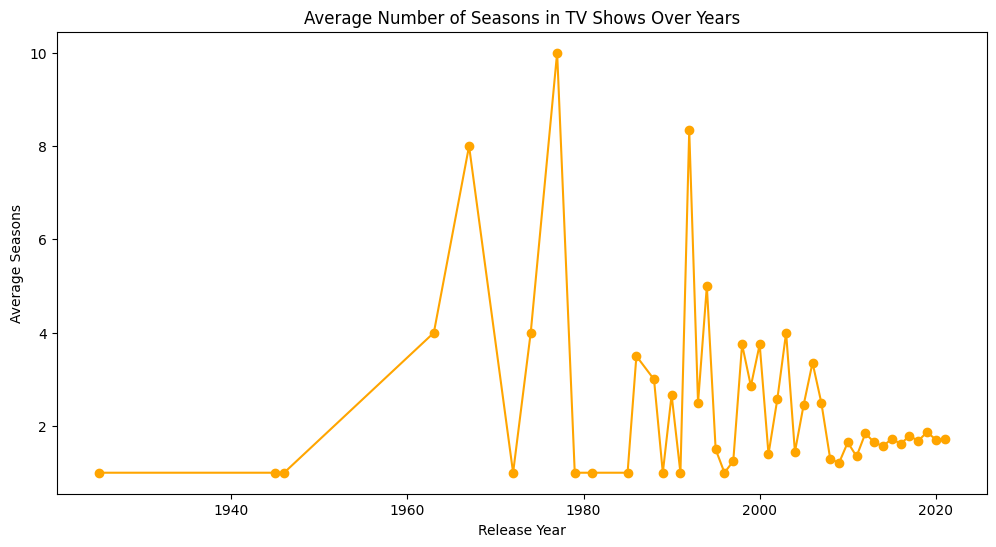

In [ ]:
tv_seasons = Netflix_Data[Netflix_Data['type']=="TV Show"].groupby('release_year')['duration_value'].mean()

plt.figure(figsize=(12,6))
tv_seasons.plot(marker='o', color='orange')
plt.title("Average Number of Seasons in TV Shows Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Seasons")
plt.show()


5. Directors & Cast

Most frequent directors

/tmp/ipython-input-227015710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette="magma")


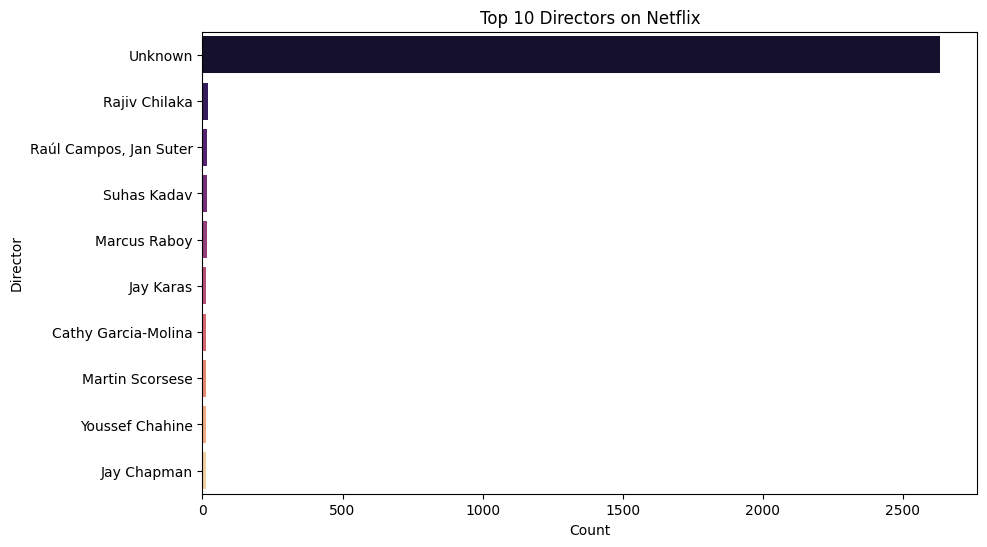

In [ ]:
top_directors = Netflix_Data['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_directors.index, x=top_directors.values, palette="magma")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()


Most frequent actors

/tmp/ipython-input-3374777067.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette="plasma")


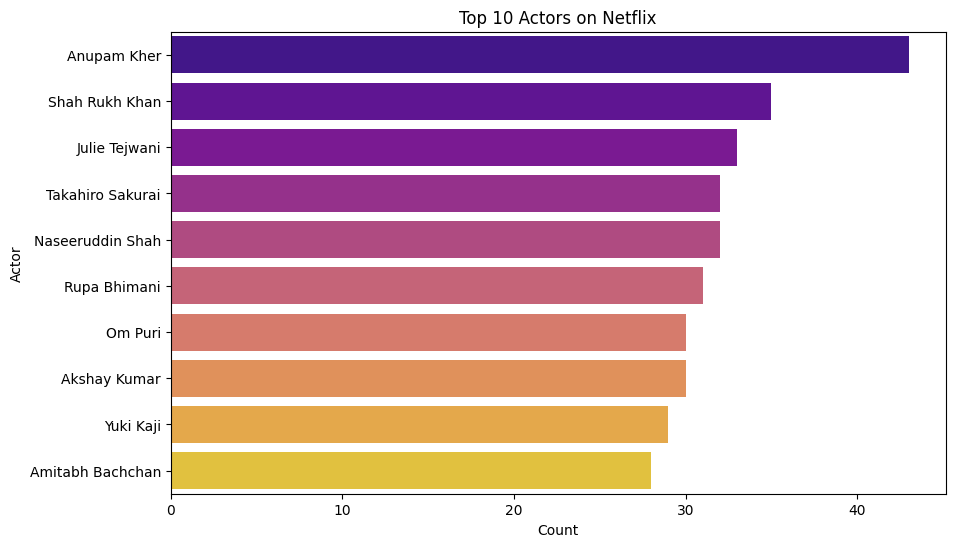

In [ ]:
# Explode cast list
Netflix_Data['cast_list'] = Netflix_Data['cast'].apply(lambda x: [c.strip() for c in x.split(',')] if x != "Unknown" else [])
cast_exploded = Netflix_Data.explode('cast_list')

top_actors = cast_exploded['cast_list'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette="plasma")
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Count")
plt.ylabel("Actor")
plt.show()


Timeline Heatmap → Content Added by Month/Year

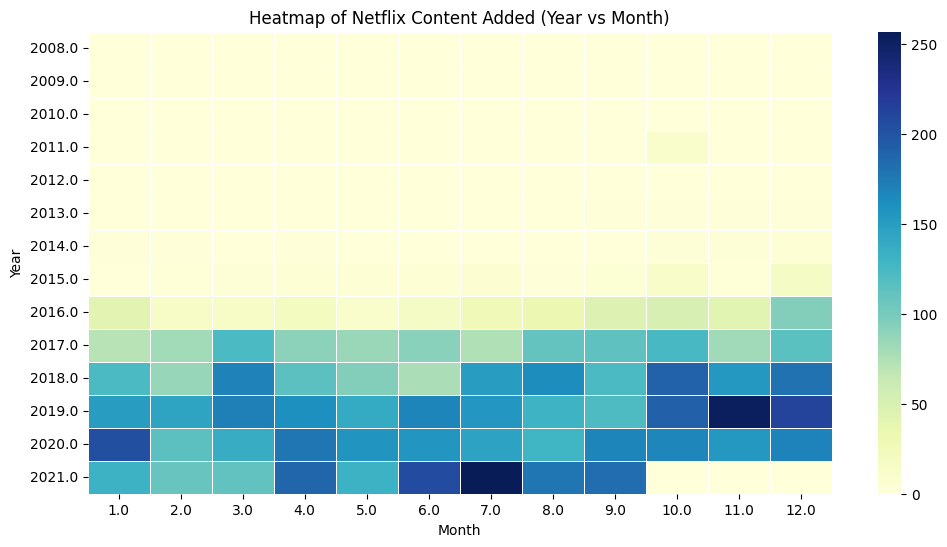

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count by year and month
heatmap_data = Netflix_Data.groupby(['year_added','month_added']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Netflix Content Added (Year vs Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


In [ ]:
# Save the cleaned DataFrame to a new CSV file
Netflix_Data.to_csv('Netflix_Data_cleaned.csv', index=False)

The cleaned data has been saved to `Netflix_Data_cleaned.csv`. You can download this file from the file explorer in the left sidebar.